In Python's multiprocessing module, you can share data between processes using various inter-process communication (IPC) mechanisms. Two common ways to share data between processes are using `multiprocessing.Array` and `multiprocessing.Value`. Here's how you can use them:

### 1. **Using `multiprocessing.Array`:**

`multiprocessing.Array` allows you to create a shared array between processes. All processes can access and modify this array.

```python
import multiprocessing

# Create a shared array of integers
shared_array = multiprocessing.Array('i', [1, 2, 3, 4, 5])

def modify_array(index, value):
    shared_array[index] = value

if __name__ == '__main__':
    # Create multiple processes
    processes = []
    for i in range(len(shared_array)):
        p = multiprocessing.Process(target=modify_array, args=(i, i*i))
        processes.append(p)
        p.start()

    # Wait for all processes to finish
    for p in processes:
        p.join()

    # Print modified shared array
    print(shared_array[:])
```

In this example, multiple processes are modifying the shared array concurrently.

### 2. **Using `multiprocessing.Value`:**

`multiprocessing.Value` allows you to create a single shared value between processes. This is useful when you need to share a single variable among processes.

```python
import multiprocessing

# Create a shared value of type 'i' (integer)
shared_value = multiprocessing.Value('i', 0)

def modify_value(val):
    shared_value.value = val

if __name__ == '__main__':
    # Create multiple processes
    processes = []
    for i in range(1, 6):
        p = multiprocessing.Process(target=modify_value, args=(i,))
        processes.append(p)
        p.start()

    # Wait for all processes to finish
    for p in processes:
        p.join()

    # Print modified shared value
    print("Shared Value:", shared_value.value)
```

In this example, multiple processes modify the shared integer value.


In [ ]:
import time
import multiprocessing

result = []

def square(arr):
    global result
    for i in arr:
        print('square: '+str(i*i))
        result.append(i*i)
    print(result)


if __name__ == "__main__":
    arr = [10,20,30,40,50]

    p1 = multiprocessing.Process(target=square,args=(arr,))
    p1.start()
    p1.join()

    print('Done')
    print(result)


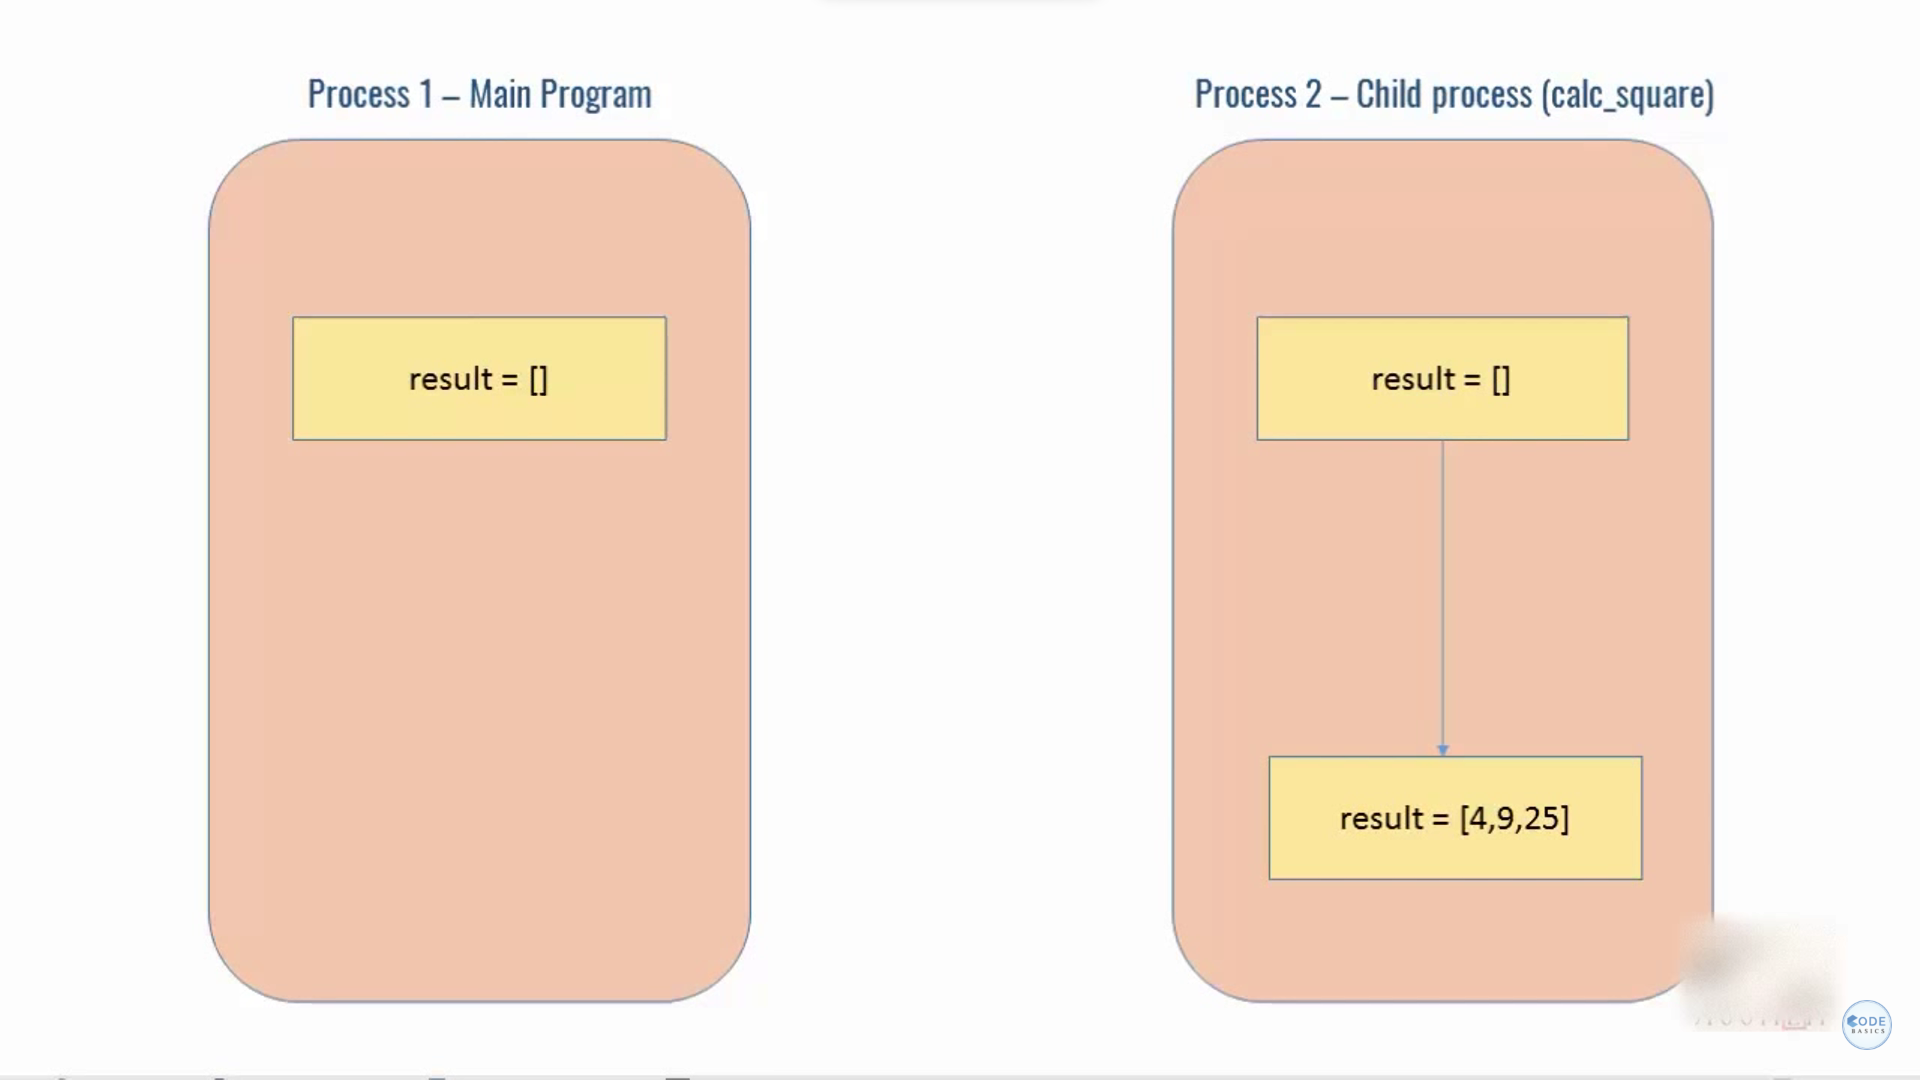

# this can be resolved by using shared memory

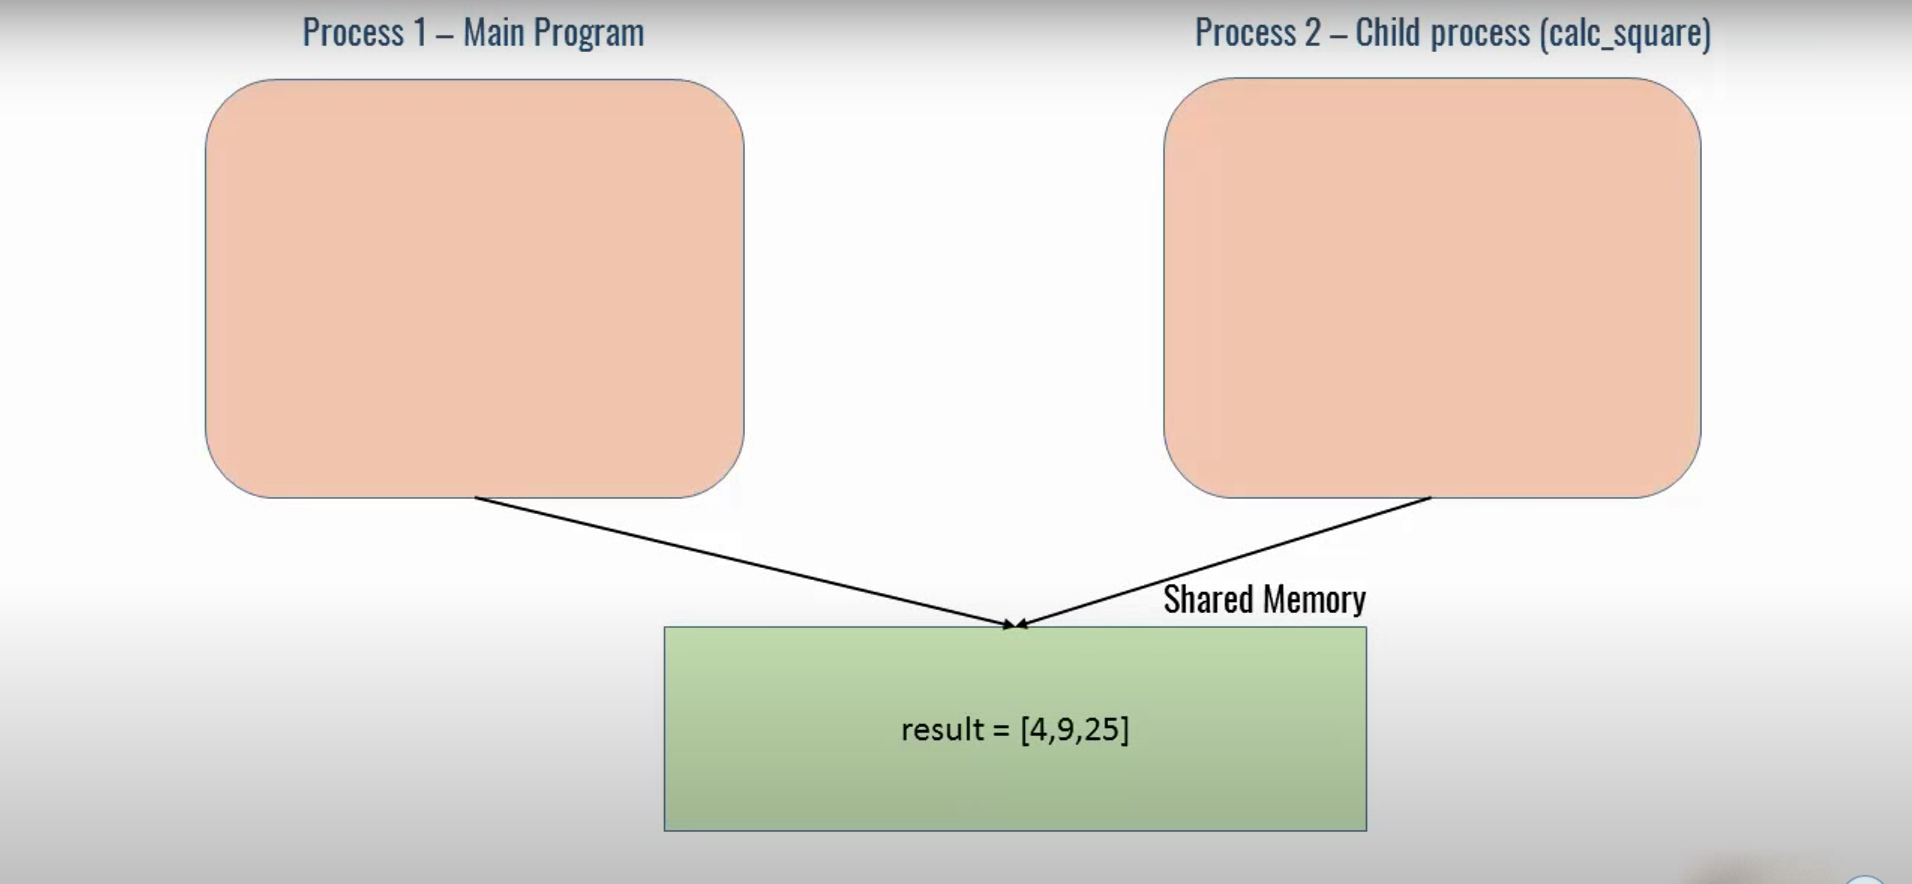

# Array shared memory

In [5]:
import time
import multiprocessing

def square(arr,result):
   
    for idx,n in enumerate(arr):
        result[idx] = n*n

if __name__ == "__main__":
    arr = [10,20,30,40,50]
    result = multiprocessing.Array('i',5) # here i means int,d means double(type,size)
    p1 = multiprocessing.Process(target=square,args=(arr,result))
    p1.start()
    p1.join()

    print(result[:])

# child process is updating the value but parent can access that thing


[0, 0, 0, 0, 0]


# value shared memory

In [6]:
import multiprocessing

def square(arr,v):
    v.value = 10
    for i,n in enumerate(arr):
        arr[i] = n*n


if __name__ == "__main__":
    arr = [12,30,40,50]
    v = multiprocessing.Value('i',0)

    p1 = multiprocessing.Process(target=square,args=(arr,v))
    
    p1.start()

    p1.join()
    print("The square of the array is: ",v.value)


The square of the array is:  0
